Perfect — here’s the **full ML lifecycle**, explained simply and clearly, like a real ML engineer would see it 👇

---

## 🔁 The Full Machine Learning Cycle (Simple Version)

### 1️⃣ Problem Definition

**What are we solving?**

➡️ Example:
“Detect whether an email is *spam* or *not spam*.”

You define:
• Input → email text
• Output → label (spam / not spam)
• Metric → accuracy, precision, recall

---

### 2️⃣ Data Collection

**Where does data come from?**

• Public datasets
• Logs / user data
• Synthetic data

➡️ For your case: spam email dataset (CSV with text + label)

---

### 3️⃣ Data Understanding & EDA

**Understand your data**

• Class balance
• Text lengths
• Common words
• Noise, duplicates

➡️ Tools: pandas, matplotlib

---

### 4️⃣ Data Cleaning & Preprocessing

For text:
• Lowercasing
• Removing punctuation
• Tokenization
• Padding / truncation

You prepare raw data ➝ model-ready data

---

### 5️⃣ Feature Engineering

• Bag of Words / TF-IDF / Embeddings
• Sequence length
• N-grams

➡️ You choose how text becomes numbers

---

### 6️⃣ Model Training

• Choose model (NN, LSTM, CNN, etc.)
• Train on train set
• Validate on val set

➡️ You fit the model to data

---

### 7️⃣ Evaluation

• Accuracy
• Precision / Recall
• Confusion matrix

➡️ Check if the model is *actually good*

---

### 8️⃣ Experimentation & Tuning

• Try different models
• Change hyperparameters
• Track results

➡️ Keep the best version

---

### 9️⃣ Model Packaging

• Save:

* model
* tokenizer
* label encoder

➡️ Make it reusable

---

### 🔟 Deployment

• Wrap in API (FastAPI)
• Dockerize
• Deploy to cloud

➡️ Now it’s a *real service*

---

### 1️⃣1️⃣ Monitoring

• Log predictions
• Detect drift
• Watch errors

➡️ Make sure it stays good

---

### 1️⃣2️⃣ Retraining

• Collect new data
• Re-train
• Re-deploy

➡️ ML is never “done”

---

## 🧠 One-Line Summary

> ML is not about training a model.
> It’s about building a **system that learns, serves, and improves over time.**

---

If you want, next I can:
✔️ Map this **directly to your Spam Detector project** step by step
✔️ Or give you a **visual diagram version**
✔️ Or a **real ML Engineer checklist PDF-style** 😎


In [29]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
pip install pandas scikit-learn tensorflow fastapi uvicorn mlflow pyyaml 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


from sklearn.model_selection import train_test_split 

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

print("Environnement prêt !")

Environnement prêt !


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\messo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
data=pd.read_csv('./data/Emails.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [38]:
#The data contains 5171 rows and four columns
data.shape

(5171, 4)

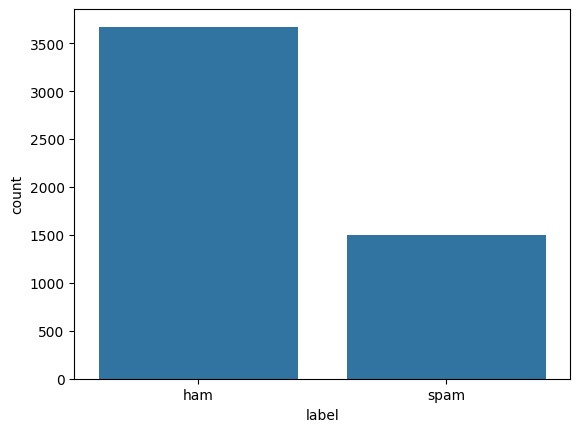

In [39]:
#get understanding of the class distribution
sns.countplot(x='label',data=data)
plt.show()

We can clearly see that number of samples of Ham is much more than that of Spam which implies that the dataset we are using is imbalanced. To address the imbalance we’ll downsample the majority class (Ham) to match the minority class (Spam).

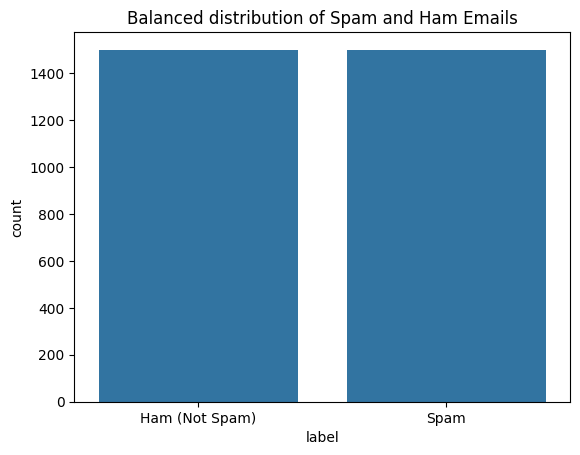

In [40]:
ham_msg=data[data['label']=='ham']
spam_msg=data[data['label']=='spam']
#In ham_msg.sample(n=len(spam_msg), random_state=42), random_state=42 sets the seed for the random number generator, ensuring that the .sample() function (which randomly picks rows from ham_msg) produces the exact same subset of data every single time you run the code, making your data balancing process reproducible. It's a common practice in data science for consistency, with 42 being a popular

ham_msg_balanced=ham_msg.sample(n=len(spam_msg),random_state=42)
# Combine balanced data .reset_index(drop=True) method is used to create a new, clean, sequential integer index (0, 1, 2, ...) for the newly combined DataFrame. 
# Without this, the combined DataFrame would retain the original, overlapping, and non-sequential indices from ham_msg_balanced and spam_msg. 
balanced_data=pd.concat([ham_msg_balanced,spam_msg]).reset_index(drop=True)


# Visualize the balanced dataset
sns.countplot(x='label',data=balanced_data)
plt.title("Balanced distribution of Spam and Ham Emails")
plt.xticks(ticks=[0,1],labels=['Ham (Not Spam)','Spam'])
plt.show()

Step 4: Clean the Text
preprocessing:removing stopwords ,punctuations, stemming/lemmatization

In [41]:
balanced_data['text']=balanced_data['text'].str.replace('Subject','')
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,: conoco - big cowboy\r\ndarren :\r\ni ' m not...,0
1,2982,ham,: feb 01 prod : sale to teco gas processing\r\...,0
2,2711,ham,": california energy crisis\r\ncalifornia  , s...",0
3,3116,ham,: re : nom / actual volume for april 23 rd\r\n...,0
4,1314,ham,: eastrans nomination changes effective 8 / 2 ...,0


In [42]:
punctuations_list = string.punctuation
def remove_punctuations(text):
    # str.maketrans(from, to, delete)
    temp=str.maketrans('','',punctuations_list)
    return text.translate(temp)
balanced_data['text']=balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()


,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sur...,0
1,2982,ham,feb 01 prod sale to teco gas processing\r\ns...,0
2,2711,ham,california energy crisis\r\ncalifornia  s p...,0
3,3116,ham,re nom actual volume for april 23 rd\r\nwe ...,0
4,1314,ham,eastrans nomination changes effective 8 2 0...,0


In [43]:
def remove_stopwords(text):
    stop_words= stopwords.words('english')
    imp_words=[]
    for word in str(text).split():
        word=word.lower()
        if word not in stop_words:
            imp_words.append(word)
    output = " ".join(imp_words)
    return output
balanced_data['text']=balanced_data['text'].apply(lambda text:remove_stopwords(text))

balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy darren sure help know else a...,0
1,2982,ham,feb 01 prod sale teco gas processing sale deal...,0
2,2711,ham,california energy crisis california  power cr...,0
3,3116,ham,nom actual volume april 23 rd agree eileen pon...,0
4,1314,ham,eastrans nomination changes effective 8 2 00 p...,0


Visualization Word Cloud
A word cloud is a text visualization tool that help's us to get insights into the most frequent words present in the corpus of the data.

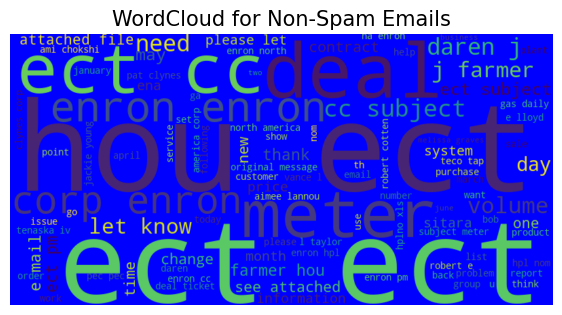

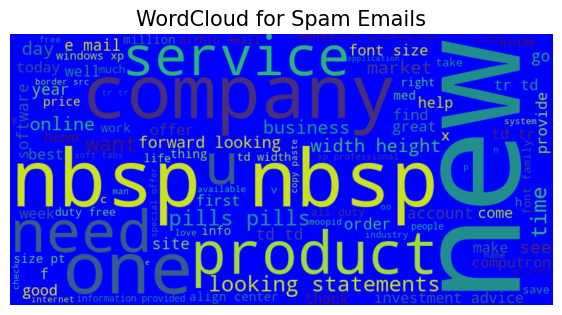

In [48]:
def plot_word_cloud(data, typ):
    email_corpus=" ".join(data['text'])
    wc= WordCloud(background_color='blue',max_words=100,width=800,height=400).generate(email_corpus)
    plt.figure(figsize=(7,7))
    plt.imshow(wc,interpolation='bilinear')
    plt.title(f'WordCloud for {typ} Emails',fontsize=15)
    plt.axis('off')
    plt.show()
plot_word_cloud(balanced_data[balanced_data['label']=='ham'],typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['label']=='spam'],typ='Spam')

Step 6: Tokenization and Padding
Machine learning models work with numbers, so we need to convert the text data into numerical vectors using Tokenization and Padding.

Tokenization: Converts each word into a unique integer.
Padding: Ensures that all text sequences have the same length, making them compatible with the model.

In [51]:
train_X,test_X,train_Y,test_Y=train_test_split(balanced_data['text'],balanced_data['label'],test_size=0.2,random_state=42)
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_X)
train_sequences=tokenizer.texts_to_sequences(train_X)
test_sequences=tokenizer.texts_to_sequences(test_X)
max_len=100
train_sequences=pad_sequences(train_sequences,maxlen=max_len,padding='post',truncating='post')
test_sequences=pad_sequences(test_sequences,maxlen=max_len,padding='post',truncating='post')
train_Y=(train_Y == 'spam').astype(int)
test_Y=(test_Y == 'spam').astype(int)

Step 7: Define the Model
We will build a deep learning model using a Sequential architecture. This model will include:

Embedding Layer: Learns vector representations of words.
LSTM Layer: Captures patterns in sequences.
Fully Connected Layer: Extracts relevant features.
Output Layer: Predicts whether an email is spam or not.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_len),
    tf.keras.layers.LSTM(16),# Bidirectional permet de lire la phrase dans les deux sens
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Step 8: Train the Model
We train the model using EarlyStopping and ReduceLROnPlateau callbacks. These callbacks help stop the training early if the model’s performance doesn’t improve and reduce the learning rate to fine-tune the model.

we evaluate the model on the test data to measure its performance.

In [66]:
es = EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)
lr= ReduceLROnPlateau(patience=2,monitor='val_loss',factor=0.5,verbose=0) #pour réduire automatiquement le taux d'apprentissage (learning rate) lorsque la performance du modèle (mesurée par une métrique, souvent la perte de validation) cesse de s'améliorer pendant un certain nombre d'époques (patience)
history=model.fit(train_sequences,train_Y,validation_data=(test_sequences,test_Y),epochs=20,batch_size=32,callbacks=[lr,es])

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9887 - loss: 0.0682 - val_accuracy: 0.9700 - val_loss: 0.1292 - learning_rate: 6.2500e-05
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9887 - loss: 0.0671 - val_accuracy: 0.9700 - val_loss: 0.1296 - learning_rate: 6.2500e-05
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9892 - loss: 0.0643 - val_accuracy: 0.9700 - val_loss: 0.1302 - learning_rate: 6.2500e-05
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9892 - loss: 0.0636 - val_accuracy: 0.9700 - val_loss: 0.1305 - learning_rate: 3.1250e-05


In [67]:
test_loss,test_accuracy=model.evaluate(test_sequences,test_Y)
print('Test Loss:',test_loss)
print('Test Accuracy :',test_accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9700 - loss: 0.1292
Test Loss: 0.1291811317205429
Test Accuracy : 0.9700000286102295


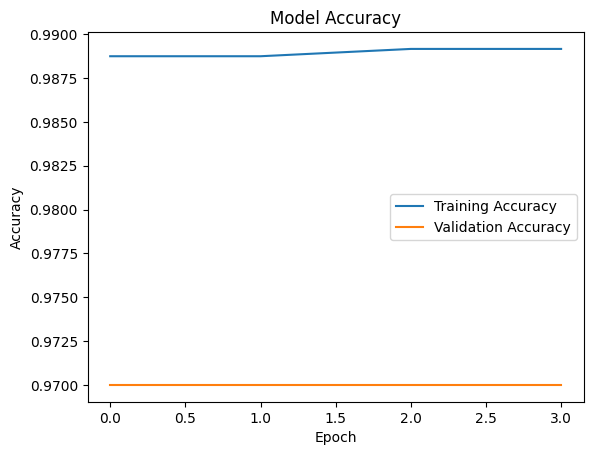

In [68]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()